In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import MinMaxScaler 

Load data

In [40]:
# Read from csv
sig_df = pd.read_csv('Dijet_bb_pt20_50_dw.csv')
bkg_df = pd.read_csv('Dijet_qq_pt20_50_dw.csv')

In [41]:
org_sig_df = sig_df.copy()
org_bkg_df = bkg_df.copy()

Truth matching & cuts

In [42]:
# Distinguish signal and background
sig_df['IsB'] = 1
bkg_df['IsB'] = 0

# Combine signal and background and shuffle
df = pd.concat([sig_df, bkg_df])

In [43]:
def truth_matching(df):
    tm_sig_df = df[(df['IsB'] == 1) &
                            (df['Jet0_MC_Match'] == 1) &
                            (df['Jet0_MC_Jet_EfB'] > 0.6) &
                            (df['Jet0_PT'] > 20000) &
                            (df['Jet0_Eta'] > 2.2) &
                            (df['Jet0_Eta'] < 4.4)]
    tm_bkg_df = df[(df['IsB'] == 0) &
                            (df['Jet0_MC_Match'] == 1) &
                            (df['Jet0_MC_Jet_EfB'] < 0.6) &
                            (df['Jet0_MC_Jet_EfD'] < 0.6) &
                            (df['Jet0_PT'] > 20000) &
                            (df['Jet0_Eta'] > 2.2) &
                            (df['Jet0_Eta'] < 4.4)]
    
    df = pd.concat([tm_sig_df, tm_bkg_df], ignore_index=True)
    return df

def convert_to_lists(daughter_cols):
    for col in daughter_cols:
        df[col] = df[col].apply(lambda x: [float(num) for num in x.strip('[]').split(',')] if isinstance(x, str) else x)
    return df

In [44]:
df = truth_matching(df)

In [45]:
# Convert string values into list of floats
daughter_cols = [col for col in df.columns if "_Daughters" in col]
df = convert_to_lists(daughter_cols)

In [47]:
sig_df = df[df['IsB'] == 1]
bkg_df = df[df['IsB'] == 0]

In [ ]:
# Visualize some graphs
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, data in enumerate(train_loader.dataset[:6]):
    G = nx.Graph()
    G.add_edges_from(data.edge_index.t().tolist())

    nx.draw(G, ax=axes[i], node_color='navy', node_size=100)
    
    axes[i].set_title(f"Graph {i+1}: {data.num_nodes} nodes, {data.edge_index.size(1)} edges")

plt.tight_layout()
plt.show()

In [121]:
def plot_before_after_cuts(col, bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Make bins the same
    all_data = np.concatenate([org_sig_df[col], org_bkg_df[col], sig_df[col], bkg_df[col]])
    data_min, data_max = np.min(all_data), np.max(all_data)

    bin_edges = np.linspace(data_min, data_max, bins + 1)

    # Before cuts
    ax1.hist(org_sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax1.hist(org_bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_xlabel(f'{col}')
    ax1.set_ylabel('Counts')
    ax1.set_title('Before Truth Matching');

    # After cuts
    ax2.hist(sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax2.hist(bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax2.legend(loc='best')
    ax2.set_yscale('log')
    ax2.set_xlabel(f'{col}')
    ax2.set_ylabel('Counts')
    ax2.set_title('After Truth Matching');

    plt.tight_layout()
    plt.show()

Plot features data

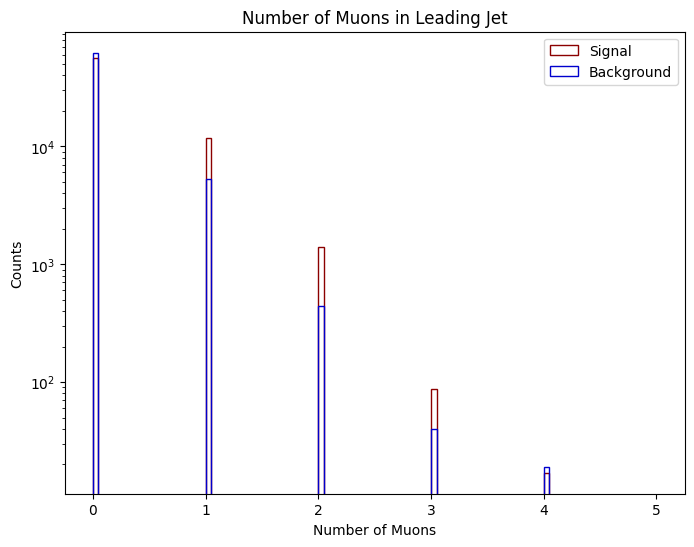

In [123]:
plt.figure(figsize=(8, 6))
plt.hist(sig_df.Jet0_nmuons, label="Signal", range=[0,5], bins=100, histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_nmuons, label="Background", range=[0,5], bins=100, histtype='step', color='mediumblue')
plt.xlabel('Number of Muons')
plt.ylabel("Counts")
plt.yscale('log')
plt.legend(loc='best')
plt.title('Number of Muons in Leading Jet'); 
plt.show()

In [130]:
def norm_feature_plot(col):
    sig_list = []
    bkg_list = []

    for i, row in sig_df.iterrows():
        vals = row[col]
        sig_list.append(vals)

    for i, row in bkg_df.iterrows():
        vals = row[col]
        bkg_list.append(vals)

    sig_array = np.array(sig_list).reshape(-1, 1)
    bkg_array = np.array(bkg_list).reshape(-1, 1)

    combined_data = np.concatenate((sig_array, bkg_array), axis=0)

    scaler = MinMaxScaler().fit(combined_data)

    sig_norm_list = scaler.transform(sig_array)
    bkg_norm_list = scaler.transform(bkg_array)
    return sig_norm_list, bkg_norm_list

In [131]:
muon_prob_sig, muon_prob_bkg = norm_feature_plot('Jet0_muon_ProbNNMu')

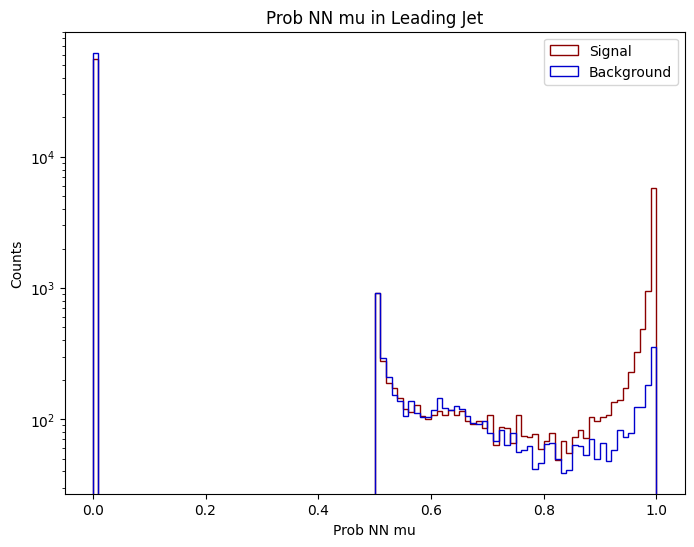

In [133]:
plt.figure(figsize=(8, 6))
plt.hist(muon_prob_sig, label="Signal", range=[0,1], bins=100, histtype='step', color='darkred')
plt.hist(muon_prob_bkg, label="Background", range=[0,1], bins=100, histtype='step', color='mediumblue')
plt.xlabel('Prob NN mu')
plt.ylabel("Counts")
plt.yscale('log')
plt.legend(loc='best')
plt.title('Prob NN mu in Leading Jet'); 
plt.show()

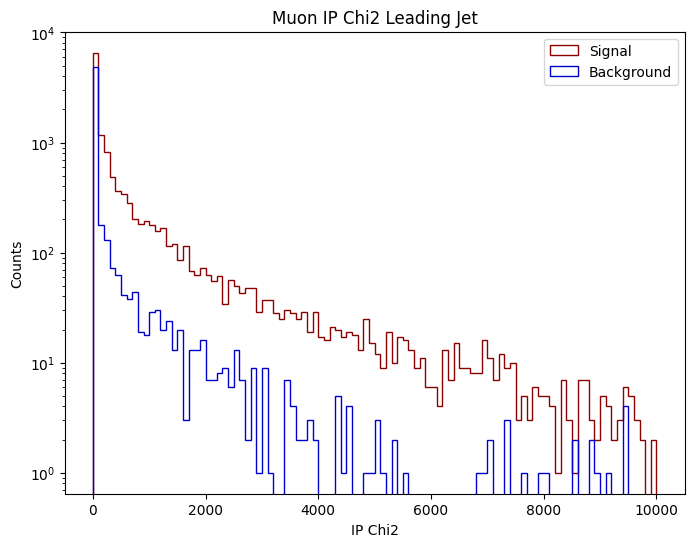

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(sig_df.Jet0_muon_IPchi2, label="Signal", range=[0,10000], bins=100, histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_muon_IPchi2, label="Background", range=[0,10000], bins=100, histtype='step', color='mediumblue')
plt.xlabel('IP Chi2')
plt.ylabel("Counts")
plt.yscale('log')
plt.legend(loc='best')
plt.title('Muon IP Chi2 Leading Jet'); 
plt.show()

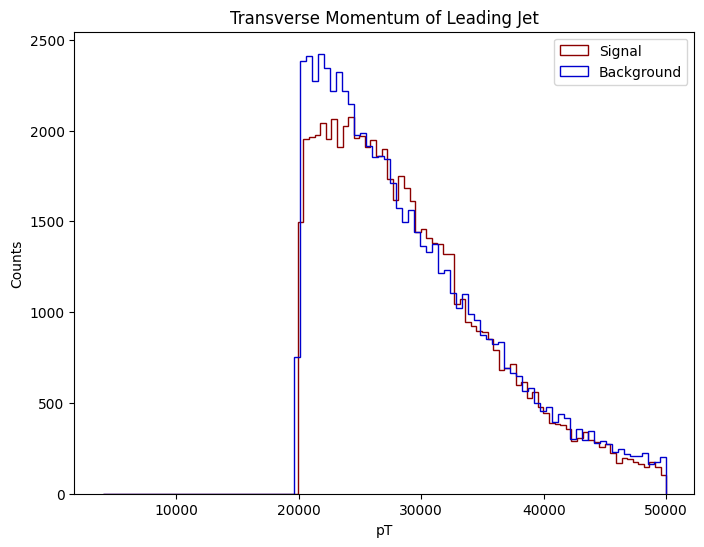

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(sig_df.Jet0_PT, label="Signal", range=[4000,50000], bins='auto', histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_PT, label="Background", range=[4000,50000], bins='auto', histtype='step', color='mediumblue')
plt.xlabel('pT')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Transverse Momentum of Leading Jet'); 
plt.show()

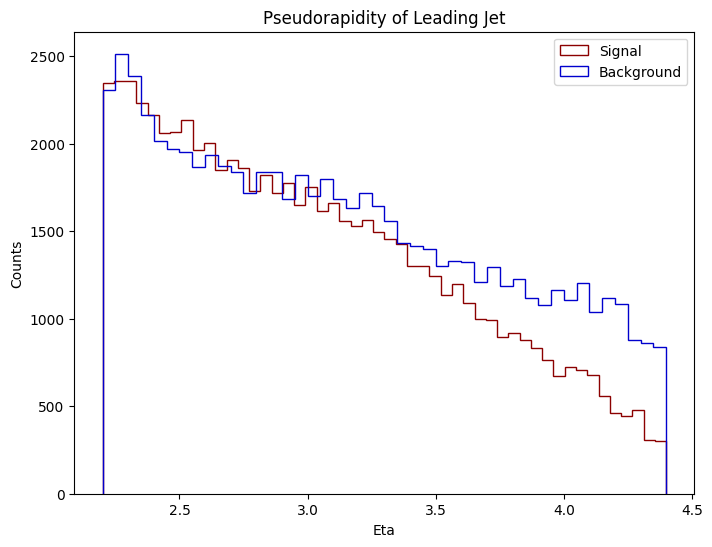

In [88]:
plt.figure(figsize=(8, 6))
plt.hist(sig_df.Jet0_Eta, label="Signal", range=None, bins='auto', histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_Eta, label="Background", range=None, bins='auto', histtype='step', color='mediumblue')
plt.xlabel('Eta')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Pseudorapidity of Leading Jet'); 
plt.show()

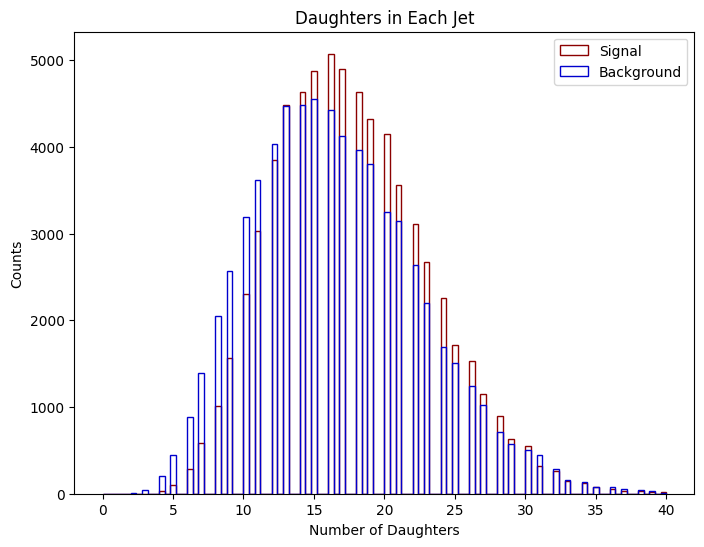

In [89]:
plt.figure(figsize=(8, 6))
plt.hist(sig_df.Jet0_nDaughters, label="Signal", range=[0,40], bins=100, histtype='step', color='darkred')
plt.hist(bkg_df.Jet0_nDaughters, label="Background", range=[0,40], bins=100, histtype='step', color='mediumblue')
plt.xlabel('Number of Daughters')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Daughters in Each Jet'); 
plt.show()

In [90]:
sig_list = []
bkg_list = []

for i, row in sig_df.iterrows():
    numbers = [float(num) for num in row['Jet0_Daughters_ID']]
    sig_list.extend(numbers)

for i, row in bkg_df.iterrows():
    numbers = [float(num) for num in row['Jet0_Daughters_ID']]
    bkg_list.extend(numbers)

In [54]:
sig_counts = Counter(sig_list)
bkg_counts = Counter(bkg_list)

In [55]:
sig_counts

Counter({22.0: 496754,
         211.0: 235952,
         -211.0: 232082,
         -22.0: 66737,
         310.0: 39285,
         321.0: 28977,
         -321.0: 28599,
         -11.0: 14963,
         11.0: 14550,
         111.0: 11397,
         2212.0: 10255,
         -2212.0: 9640,
         -13.0: 5456,
         13.0: 5055,
         -3122.0: 4861,
         3122.0: 4722})

In [56]:
bkg_counts

Counter({22.0: 459141,
         211.0: 229267,
         -211.0: 223814,
         -22.0: 63545,
         321.0: 28592,
         -321.0: 27363,
         310.0: 17327,
         2212.0: 17210,
         -2212.0: 16193,
         -11.0: 12551,
         11.0: 12104,
         111.0: 11790,
         -3122.0: 2501,
         3122.0: 2409,
         -13.0: 1114,
         13.0: 945})

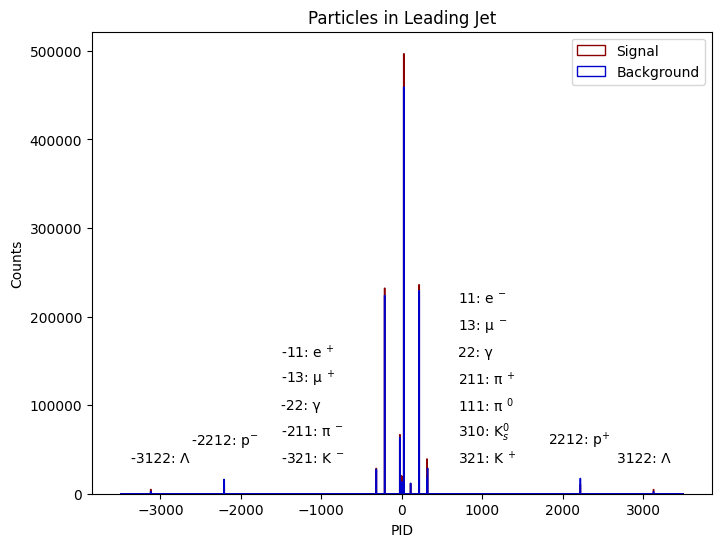

In [91]:
# Plot of Jet 0 Daughters PID (not including some outliers)
plt.figure(figsize=(8, 6))
plt.hist(sig_list, label='Signal', bins=1000, range=[-3500,3500], histtype='step', color='darkred')
plt.hist(bkg_list, label='Background', bins=1000, range=[-3500,3500], histtype='step', color='mediumblue')

plt.text(-3000, 40000, '-3122: Λ', horizontalalignment='center', verticalalignment='center')
plt.text(-2200, 60000, '-2212: p$^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-1500, 40000, '-321: K $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 70000, '-211: π $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 100000, '-22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 130000, '-13: µ $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1500, 160000, '-11: e $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.text(700, 220000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 190000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 160000, '22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(700, 130000, '211: π $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 100000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 70000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(700, 40000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(2200, 60000, '2212: p$^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(3000, 40000, '3122: Λ', horizontalalignment='center', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Leading Jet');
plt.legend(loc='best');
plt.show()

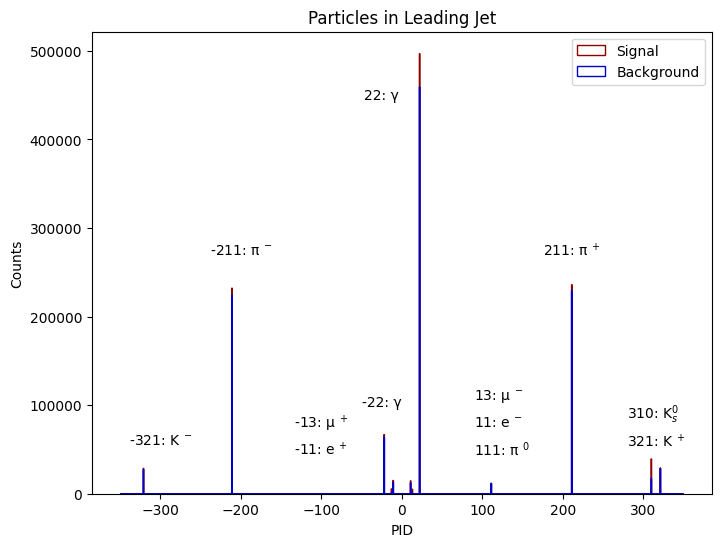

In [92]:
# Plot of Daughters PID in range of pions and kaons
plt.figure(figsize=(8, 6))
plt.hist(sig_list, label='Signal', bins=1000, range=[-350,350], histtype='step', color='darkred')
plt.hist(bkg_list, label='Background', bins=1000, range=[-350,350], histtype='step', color='mediumblue')

plt.text(-300, 60000, '-321: K $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-200, 275000, '-211: π $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-25, 103000, '-22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 80000, '-13: µ $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 50000, '-11: e $^{+}$', horizontalalignment='center', verticalalignment='center')

plt.text(90, 80000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(90, 110000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-25, 450000, '22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(90, 50000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(211, 275000, '211: π $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(280, 90000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(280, 60000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Leading Jet');
plt.legend(loc='best');
plt.show()

In [59]:
ipchi2_sig_list = []
ipchi2_bkg_list = []

for i, row in sig_df.iterrows():
    vals = row['Jet0_Daughters_IPCHI2']
    ipchi2_sig_list.extend(vals)

for i, row in bkg_df.iterrows():
    vals = row['Jet0_Daughters_IPCHI2']
    ipchi2_bkg_list.extend(vals)

ipchi2_sig_array = np.array(ipchi2_sig_list).reshape(-1, 1)
ipchi2_bkg_array = np.array(ipchi2_bkg_list).reshape(-1, 1)

combined_data = np.concatenate((ipchi2_sig_array, ipchi2_bkg_array), axis=0)

scaler = MinMaxScaler().fit(combined_data)

ipchi2_sig_norm_list = scaler.transform(ipchi2_sig_array)
ipchi2_bkg_norm_list = scaler.transform(ipchi2_bkg_array)

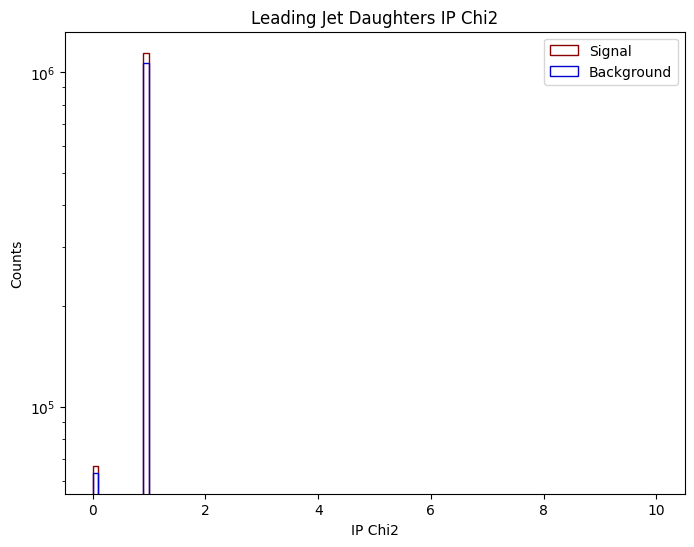

In [93]:
plt.figure(figsize=(8, 6))
plt.hist(ipchi2_sig_norm_list, label='Signal', bins=100, range=[0, 10], histtype='step', color='darkred')
plt.hist(ipchi2_bkg_norm_list, label='Background', bins=100, range=[0, 10], histtype='step', color='mediumblue')
plt.xlabel('IP Chi2');
plt.ylabel('Counts');
plt.yscale('log')
plt.title('Leading Jet Daughters IP Chi2');
plt.legend(loc='best');
plt.show()

In [94]:
def norm_daughters_plot(col):
    sig_list = []
    bkg_list = []

    for i, row in sig_df.iterrows():
        vals = row[col]
        sig_list.extend(vals)

    for i, row in bkg_df.iterrows():
        vals = row[col]
        bkg_list.extend(vals)

    sig_array = np.array(sig_list).reshape(-1, 1)
    bkg_array = np.array(bkg_list).reshape(-1, 1)

    combined_data = np.concatenate((sig_array, bkg_array), axis=0)

    scaler = MinMaxScaler().fit(combined_data)

    sig_norm_list = scaler.transform(sig_array)
    bkg_norm_list = scaler.transform(bkg_array)
    return sig_norm_list, bkg_norm_list

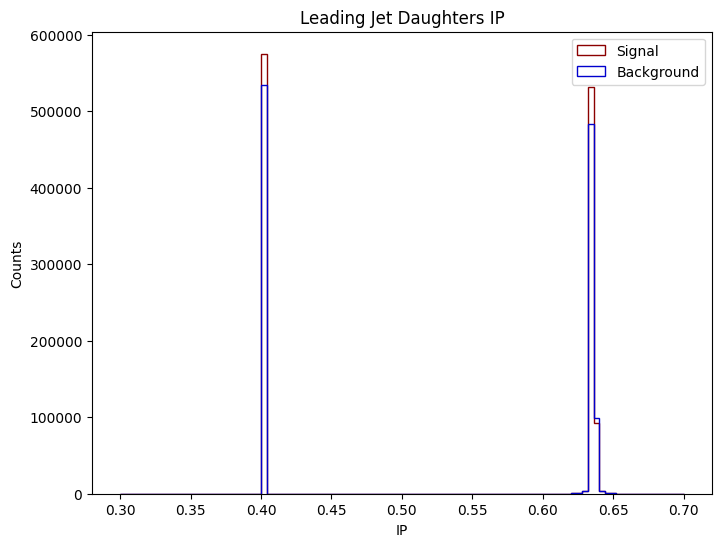

In [95]:
ip_sig, ip_bkg = norm_daughters_plot('Jet0_Daughters_IP')

plt.figure(figsize=(8, 6))
plt.hist(ip_sig, label='Signal', bins=100, range=[0.3,0.7], histtype='step', color='darkred')
plt.hist(ip_bkg, label='Background', bins=100, range=[0.3,0.7], histtype='step', color='mediumblue')
plt.yscale('linear')
plt.xlabel('IP');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters IP');
plt.legend(loc='best');
plt.show()

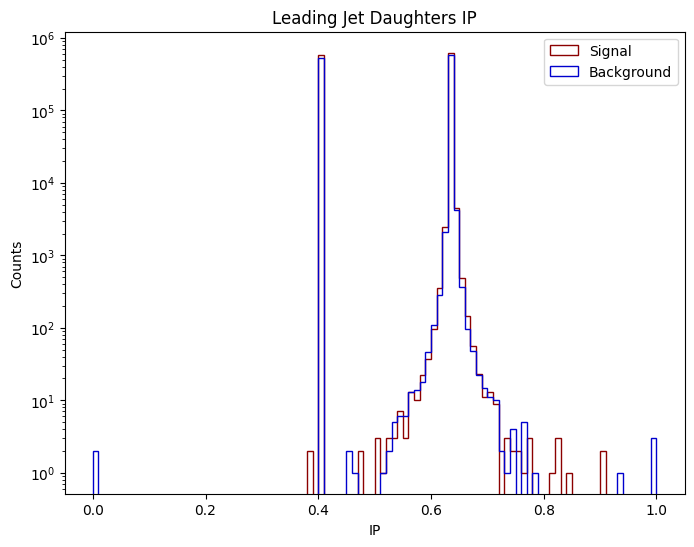

In [96]:
ip_sig, ip_bkg = norm_daughters_plot('Jet0_Daughters_IP')

plt.figure(figsize=(8, 6))
plt.hist(ip_sig, label='Signal', bins=100, range=[0,1], histtype='step', color='darkred')
plt.hist(ip_bkg, label='Background', bins=100, range=[0,1], histtype='step', color='mediumblue')
plt.yscale('log')
plt.xlabel('IP');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters IP');
plt.legend(loc='best');
plt.show()

In [97]:
e_sig, e_bkg = norm_daughters_plot('Jet0_Daughters_E')

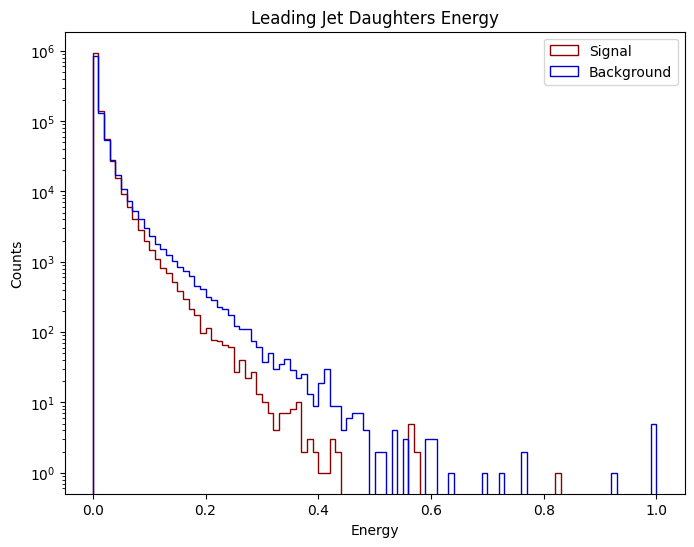

In [98]:
plt.figure(figsize=(8, 6))
plt.hist(e_sig, label='Signal', bins=100, range=[0,1], histtype='step', color='darkred')
plt.hist(e_bkg, label='Background', bins=100, range=[0,1], histtype='step', color='mediumblue')
plt.yscale('log')
plt.xlabel('Energy');
plt.ylabel('Counts');
plt.title('Leading Jet Daughters Energy');
plt.legend(loc='best');
plt.show()

In [99]:
def make_plots(col, bins, range, scale):

    plt.figure(figsize=(8, 6))
    plt.hist(sig_df[col], label="Signal", bins=bins, range=range, histtype='step', color='darkred')
    plt.hist(bkg_df[col], label="Background", bins=bins, range=range, histtype='step', color='mediumblue')
    plt.legend(loc='best')
    plt.yscale(scale)
    plt.xlabel(f'{col}')
    plt.ylabel('Counts')
    plt.title(f'{col}');

    plt.tight_layout()
    plt.show()

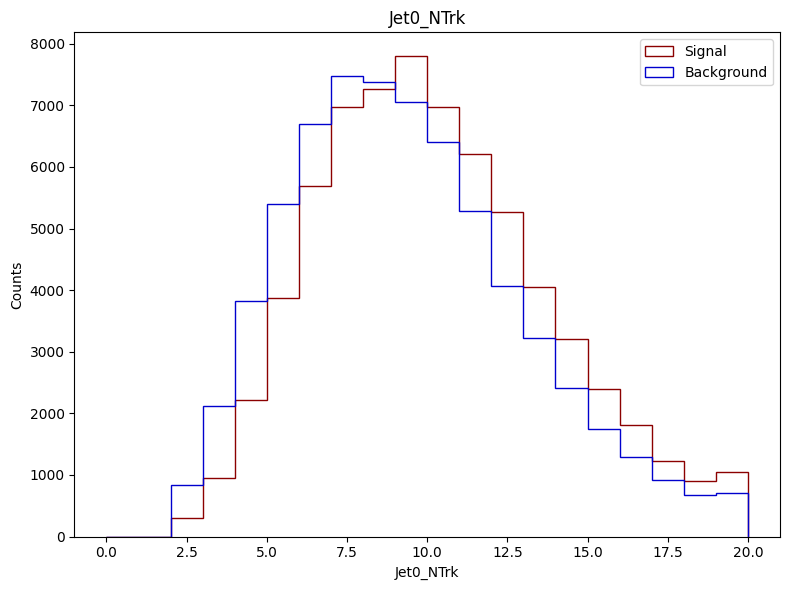

In [100]:
make_plots('Jet0_NTrk', 20, [0,20], 'linear')

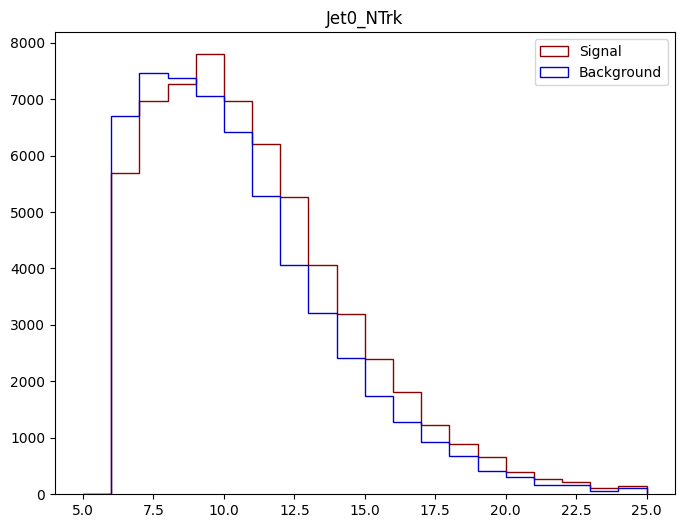

In [101]:
# only plot Jet0_NTrk > 5
dfcut = sig_df[sig_df.Jet0_NTrk > 5]
df2cut = bkg_df[bkg_df.Jet0_NTrk > 5]

plt.figure(figsize=(8, 6))
plt.hist(dfcut.Jet0_NTrk, label="Signal", bins=20, range=[5,25], histtype='step', color='darkred')
plt.hist(df2cut.Jet0_NTrk, label="Background", bins=20, range=[5,25], histtype='step', color='mediumblue')
plt.legend(loc='best')
plt.title("Jet0_NTrk");
plt.show()

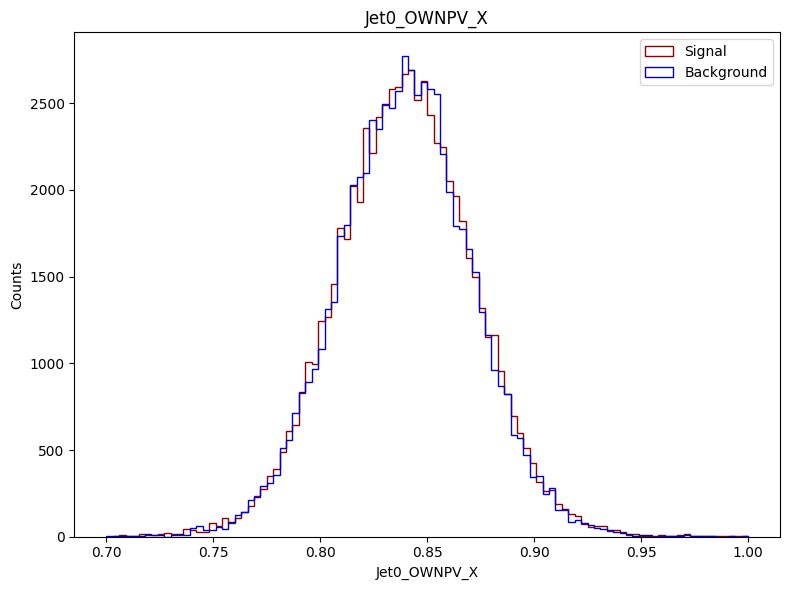

In [102]:
make_plots('Jet0_OWNPV_X', 100, [0.7,1], 'linear')

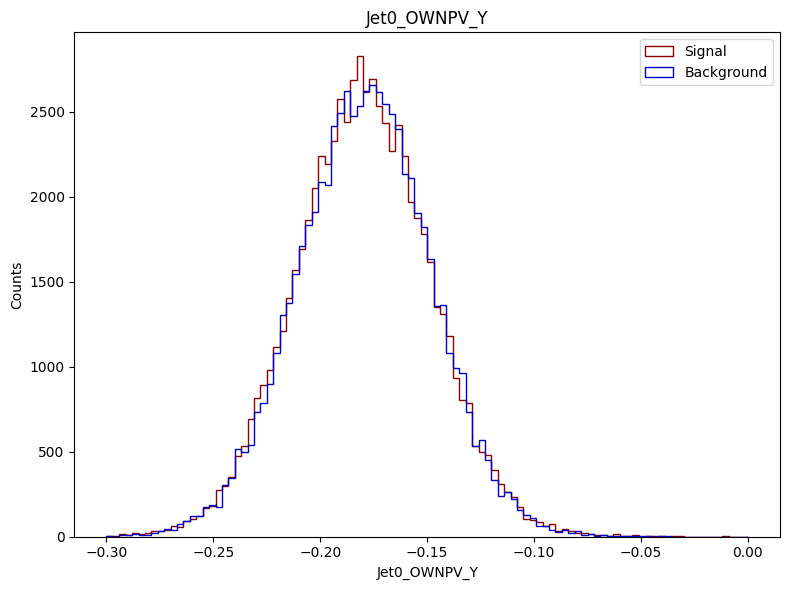

In [103]:
make_plots('Jet0_OWNPV_Y', 100, [-0.3,0], 'linear')

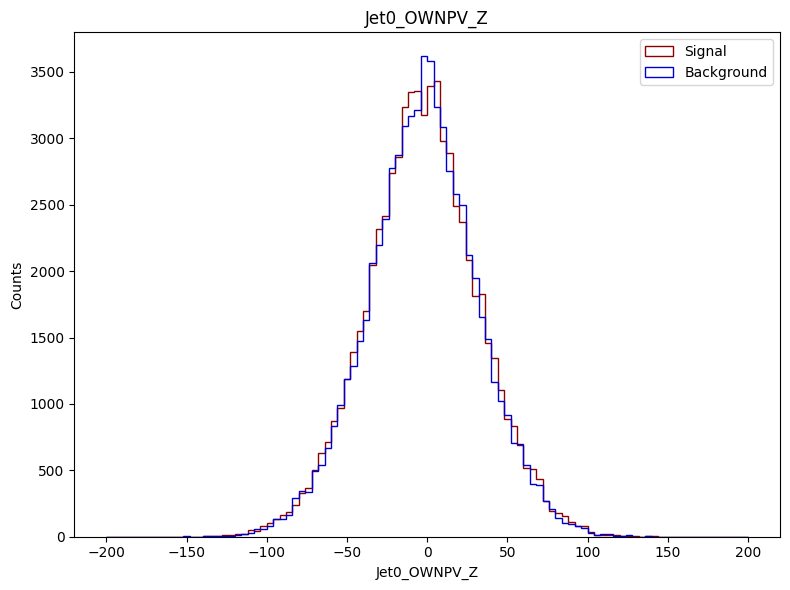

In [104]:
make_plots('Jet0_OWNPV_Z', 100, [-200,200], 'linear')

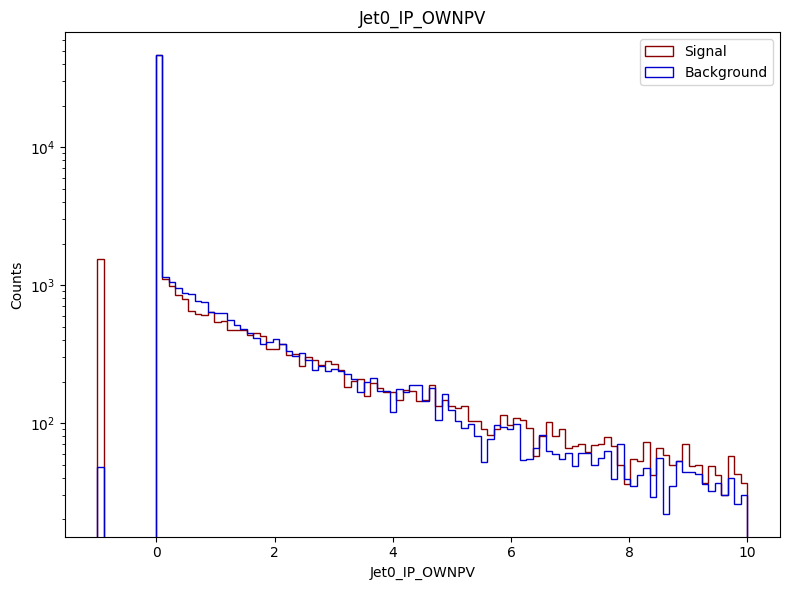

In [105]:
make_plots('Jet0_IP_OWNPV', 100, [-1,10], 'log')

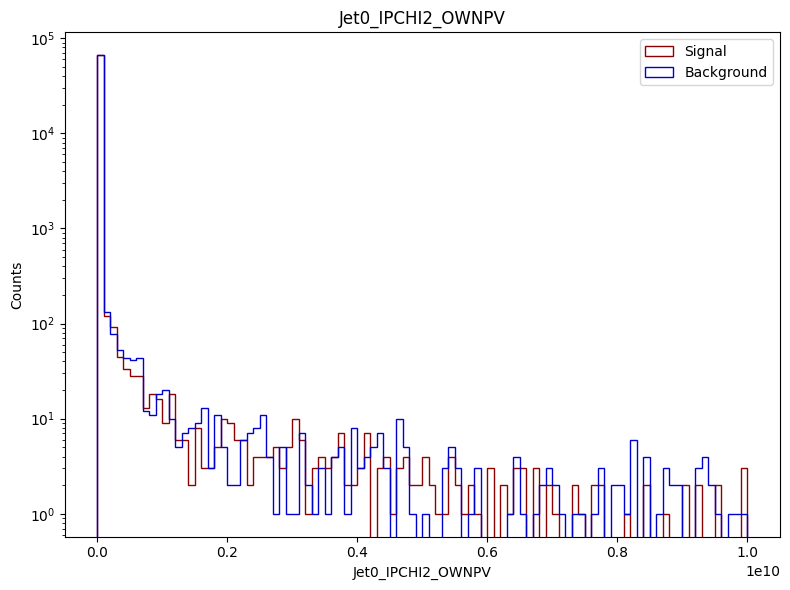

In [106]:
make_plots('Jet0_IPCHI2_OWNPV', 100, [-0.01,1e10], 'log')

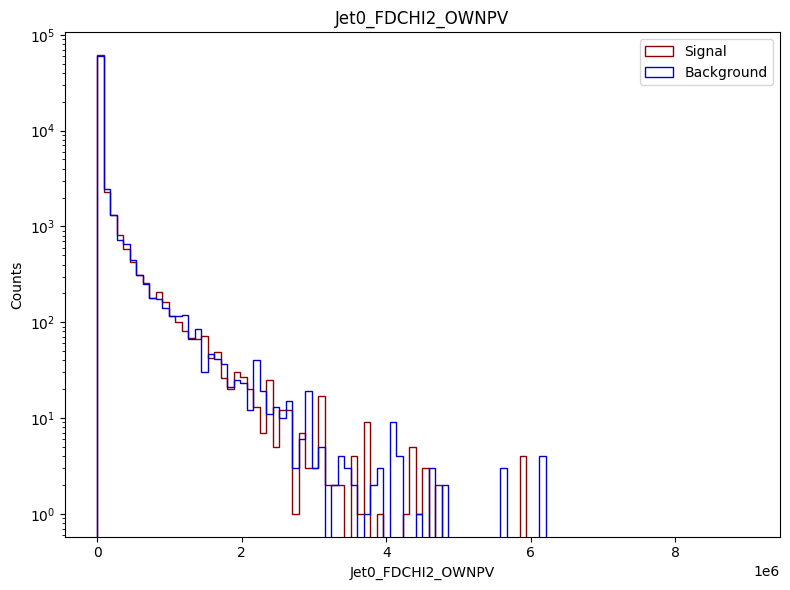

In [107]:
make_plots('Jet0_FDCHI2_OWNPV', 100, [0,9e6], 'log')

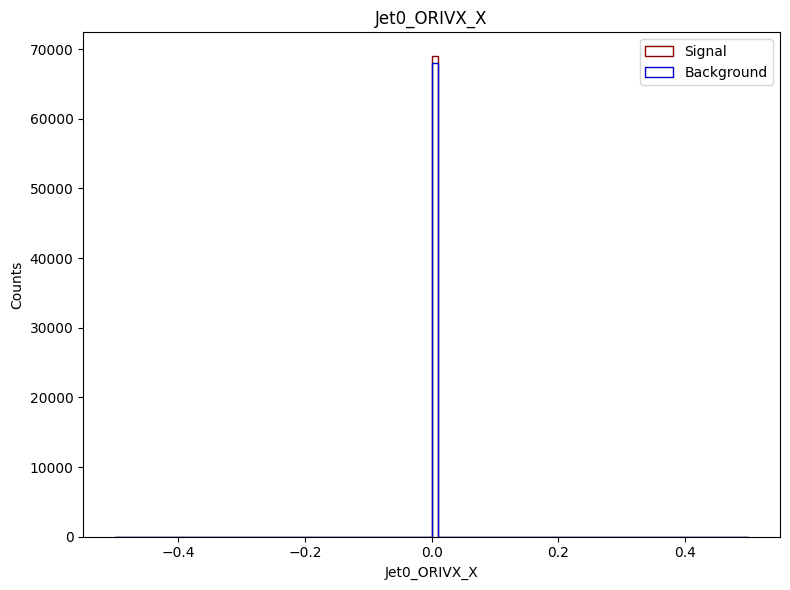

In [108]:
make_plots('Jet0_ORIVX_X', 100, None, 'linear')

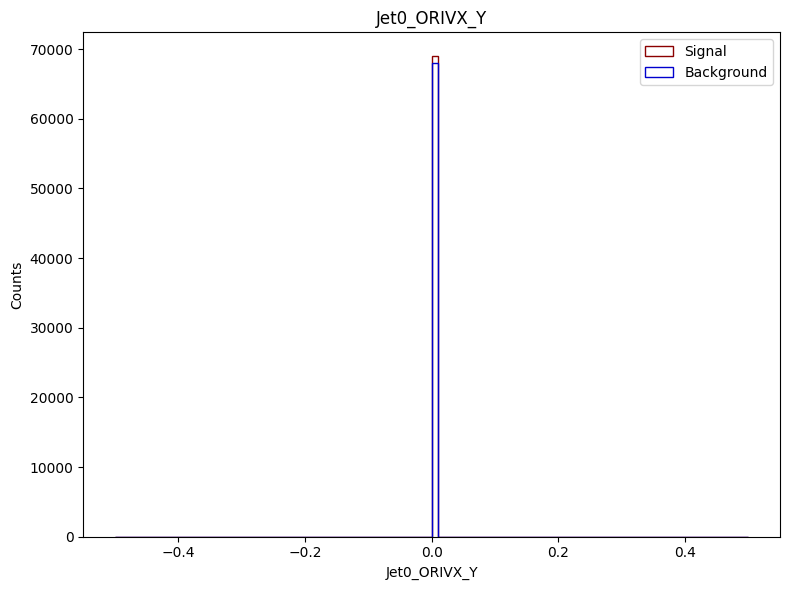

In [109]:
make_plots('Jet0_ORIVX_Y', 100, None, 'linear')

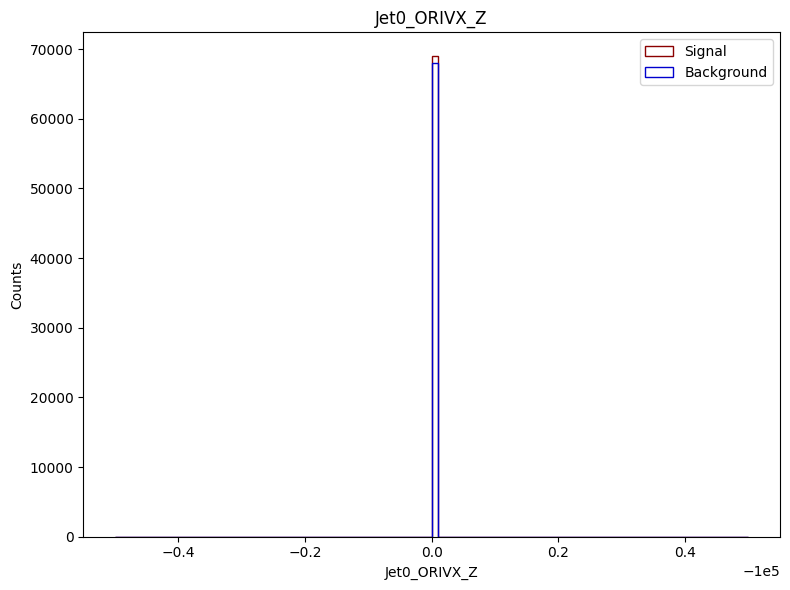

In [110]:
make_plots('Jet0_ORIVX_Z', 100, None, 'linear')

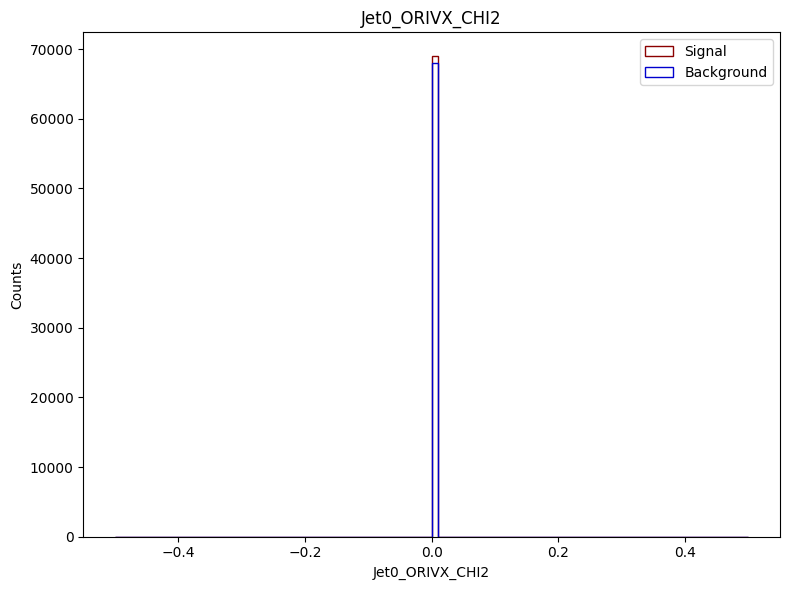

In [111]:
make_plots('Jet0_ORIVX_CHI2', 100, None, 'linear')

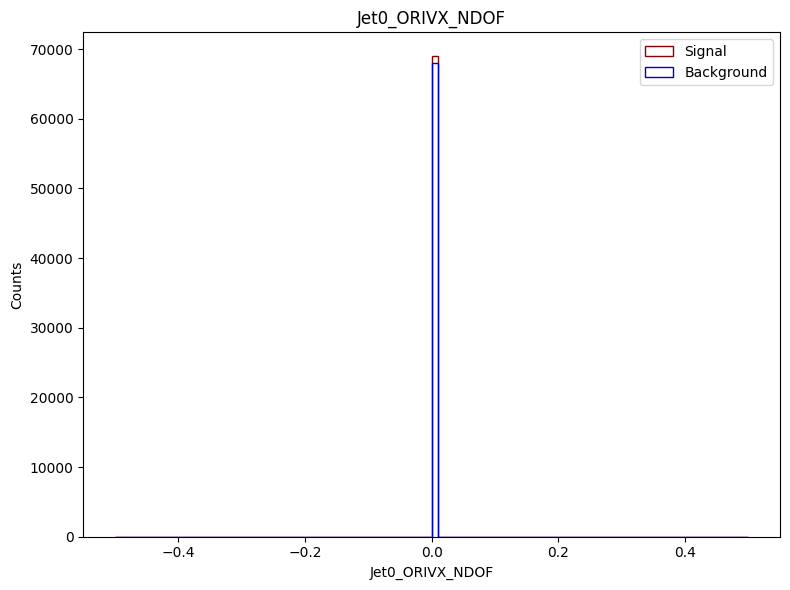

In [112]:
make_plots('Jet0_ORIVX_NDOF', 100, None, 'linear')

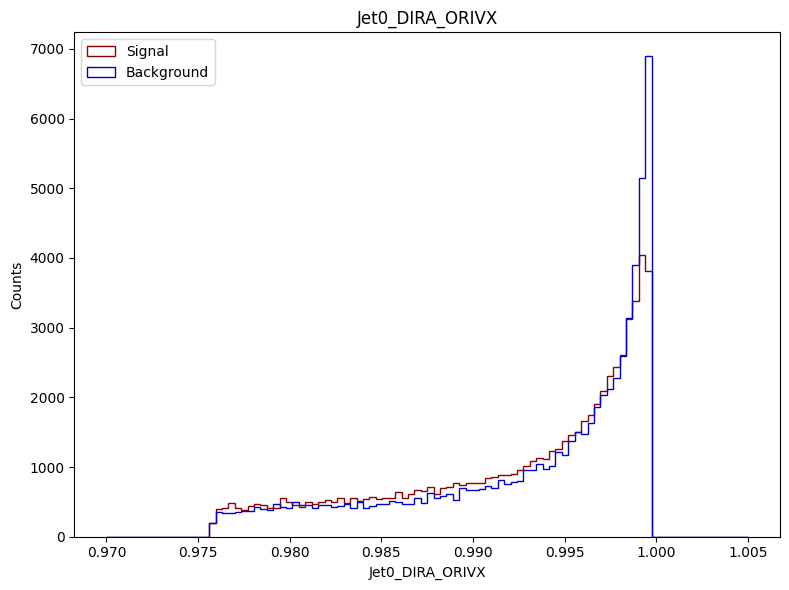

In [113]:
make_plots('Jet0_DIRA_ORIVX', 100, [0.97 ,1.005], 'linear')

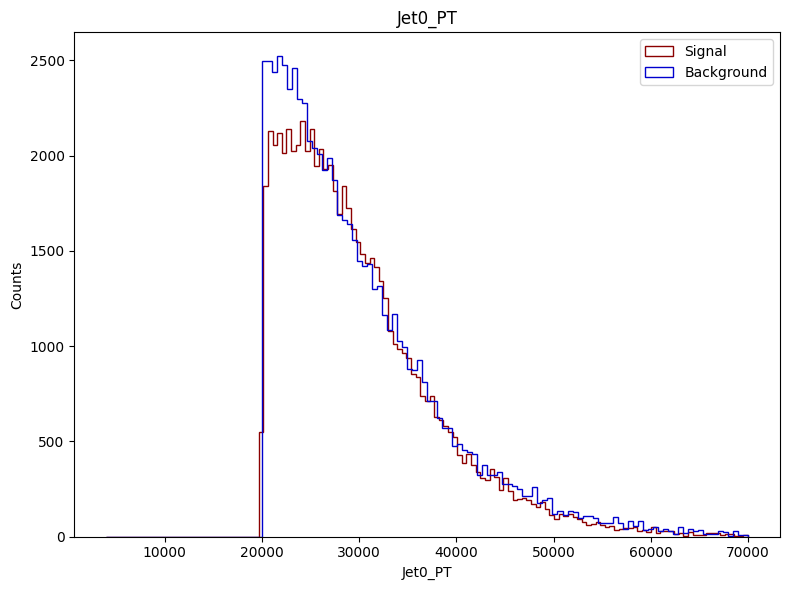

In [114]:
make_plots('Jet0_PT', 'auto', [4000,70000], 'linear')

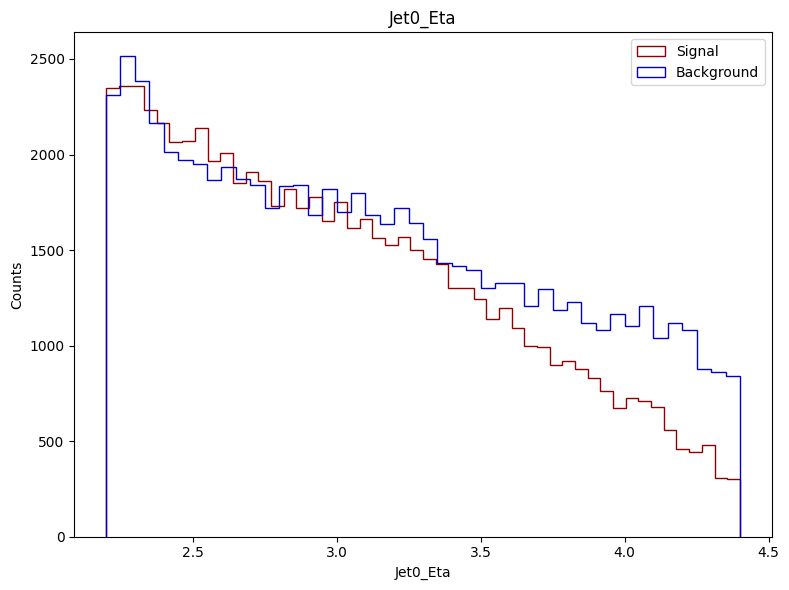

In [115]:
make_plots('Jet0_Eta', 'auto', None, 'linear')

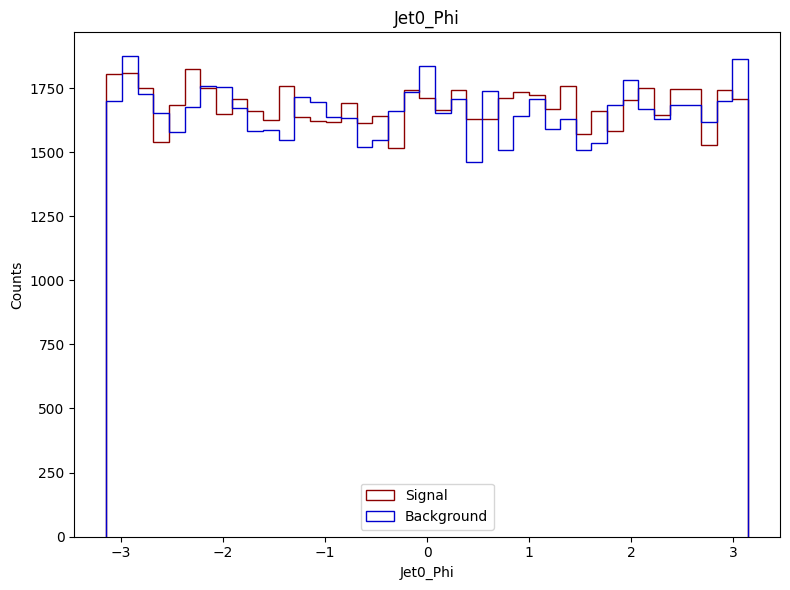

In [116]:
make_plots('Jet0_Phi', 'auto', None, 'linear')